In [1]:
#importing the required libraries
import matplotlib.pyplot as plt_q2
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [2]:
#splitting the dataset into train val test.
iris_q2=load_iris()
data_array=iris_q2.data
target_array=iris_q2.target
X_train_data,X_test_data,y_train_target,y_test_target=train_test_split(data_array,target_array,test_size=0.20,train_size=0.80,random_state=42)
X_train1_data, X_val_data, y_train1_target, y_val_target=train_test_split(X_train_data, y_train_target, test_size=0.25,random_state=42)


In [3]:
#training the classifier and taking neighbors =5 to predict the labels for test data.
knn_q2 = KNeighborsClassifier(n_neighbors=5)

knn_q2.fit(X_train1_data, y_train1_target)
#predicting the x_test_data
y_pred_target = knn_q2.predict(X_test_data)
#comparing the labels to find accuracy of our model on test data.
score=metrics.accuracy_score(y_test_target, y_pred_target)
print("initial test accuracy at test dataset=:: ",score)
print("\n\n")

initial test accuracy at test dataset=::  0.9666666666666667





<h4>On training the model and testing the test data initially leaving the hyperparameters as default, I have found that the accuracy is about 0.9666666666666667.</h4>

In [4]:
#finding the best k by testing on validation set.
scores_val = []
print("validation accuracy : \n\n")
k_in_val=[1,5,10,15,20,25,30,35]
for k in k_in_val:
    knn_q2= KNeighborsClassifier(n_neighbors=k)
    knn_q2.fit(X_train1_data, y_train1_target)
#predicting validation data
    y_pred1_target= knn_q2.predict(X_val_data)
    scores_val.append(metrics.accuracy_score(y_val_target, y_pred1_target))
    print("Accuracy at k= ",k," for validation set is ",metrics.accuracy_score(y_val_target, y_pred1_target))

validation accuracy : 


Accuracy at k=  1  for validation set is  0.9
Accuracy at k=  5  for validation set is  0.9333333333333333
Accuracy at k=  10  for validation set is  0.9333333333333333
Accuracy at k=  15  for validation set is  0.9333333333333333
Accuracy at k=  20  for validation set is  0.9333333333333333
Accuracy at k=  25  for validation set is  0.9666666666666667
Accuracy at k=  30  for validation set is  0.9666666666666667
Accuracy at k=  35  for validation set is  0.9333333333333333


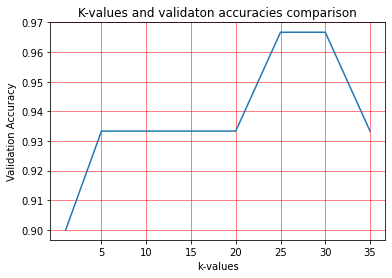

In [5]:
#plotting the graph for validation accuracy and k values.
plt_q2.plot(k_in_val,scores_val)
plt_q2.xticks(ticks=[5,10,15,20,25,30,35])
plt_q2.title("K-values and validaton accuracies comparison")
plt_q2.xlabel("k-values")
plt_q2.ylabel("Validation Accuracy")
plt_q2.grid(linewidth=0.5,color='r')
plt_q2.show()

In [6]:
# finding the best value of k

best_k=k_in_val[scores_val.index((max(scores_val)))]
print("best accuracy with validtaion set is ::",max(scores_val),"at k=",best_k)


best accuracy with validtaion set is :: 0.9666666666666667 at k= 25


<h3>Thus, in order to find the best hyperparameters(here n_neighbors), I have tested the validation dataset passing different k values and found out that we get highest accuracy at two different values of k i.e at k=25,30.</h3>
<h3>I have selected k=25 to tune the final model to predict the test set as it is incorporating enough patterns to make the classifier learn. if we select a higher value of k, it increases the computational complexity and if we select a value which is too low, it will result in overfitting.</h3>

In [7]:
# using the best k found in validation to find the test accuracy
knn_q2 = KNeighborsClassifier(n_neighbors=25)
knn_q2.fit(X_train1_data, y_train1_target)
y_pred2_target = knn_q2.predict(X_test_data)
scores_test1=metrics.accuracy_score(y_test_target, y_pred2_target)
print("Final test accuracy at best value of k= ",best_k," is ",scores_test1)


Final test accuracy at best value of k=  25  is  1.0



<h3>However, I also choose k as 25 because it is an odd number so that there is no clash while finding the nearest classes. i.e if I choose k=30, there can be 15 nearest samples having class Setosa and 15 as class Virginica</h3>
